# Лабка №5

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

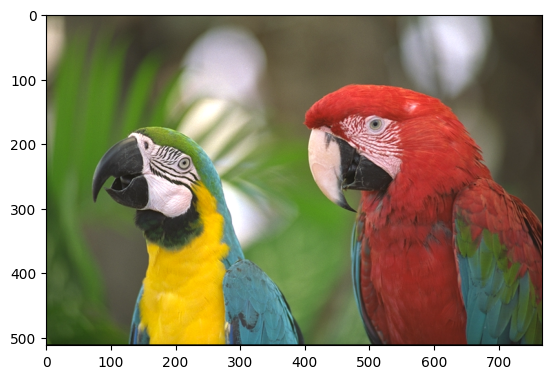

In [2]:
# Load image
img = cv2.imread('imgs/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [4]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

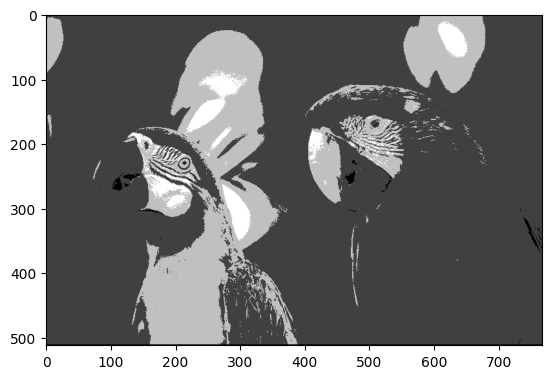

In [5]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [6]:
# Compute average quantization error
avg_quant_error = (img - quantized).mean()
avg_quant_error

np.float64(9.172204759385851)

In [7]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Compute quantization error
        quant_error = (pixel - new_pixel).mean()
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r + 1][c    ] = img_tmp[r + 1][c    ] + quant_error * 7 / 16
        img_tmp[r - 1][c + 1] = img_tmp[r - 1][c + 1] + quant_error * 3 / 16
        img_tmp[r    ][c + 1] = img_tmp[r    ][c + 1] + quant_error * 5 / 16
        img_tmp[r + 1][c + 1] = img_tmp[r + 1][c + 1] + quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x2d080922ab0>)

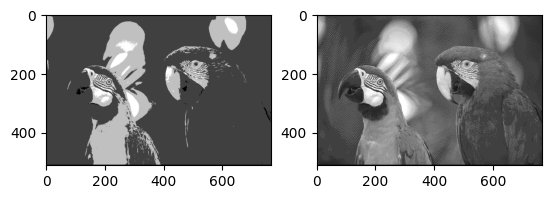

In [8]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [9]:
# Compute average quantization error for dithered image
avg_dith_error = (img - dithering).mean()
avg_dith_error

np.float64(2.18196529812283)

## З чорно-білим

In [10]:
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])

In [11]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

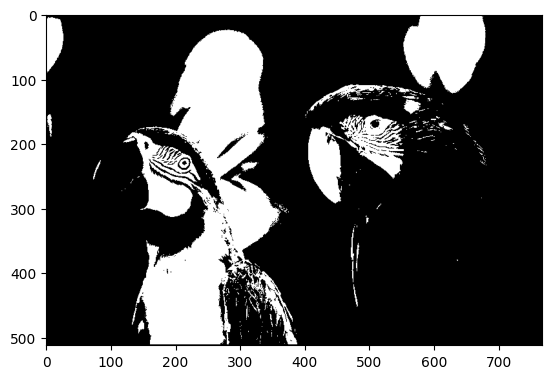

In [12]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [13]:
# Compute average quantization error
avg_quant_error = (img - quantized).mean()
avg_quant_error

np.float64(46.292535569932724)

In [14]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Compute quantization error
        quant_error = (pixel - new_pixel).mean()
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r + 1][c    ] = img_tmp[r + 1][c    ] + quant_error * 7 / 16
        img_tmp[r - 1][c + 1] = img_tmp[r - 1][c + 1] + quant_error * 3 / 16
        img_tmp[r    ][c + 1] = img_tmp[r    ][c + 1] + quant_error * 5 / 16
        img_tmp[r + 1][c + 1] = img_tmp[r + 1][c + 1] + quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x2d080040440>)

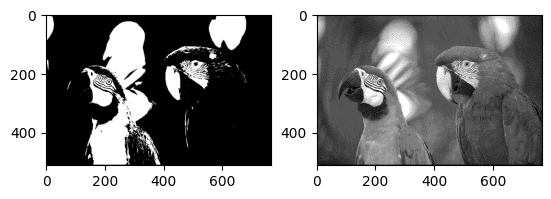

In [15]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [16]:
# Compute average quantization error for dithered image
avg_dith_error = (img - dithering).mean()
avg_dith_error

np.float64(1.9948976304796007)

## Bonus points

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

In [18]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

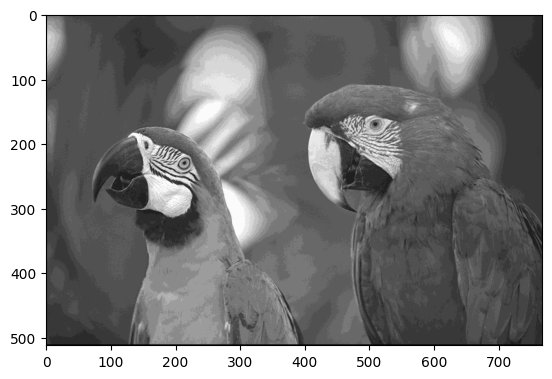

In [19]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [25]:
# Compute average quantization error
avg_quant_error = (img - quantized).mean()
avg_quant_error

np.float64(-0.04531256819310914)

In [21]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Compute quantization error
        quant_error = (pixel - new_pixel).mean()
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r + 1][c    ] = img_tmp[r + 1][c    ] + quant_error * 7 / 16
        img_tmp[r - 1][c + 1] = img_tmp[r - 1][c + 1] + quant_error * 3 / 16
        img_tmp[r    ][c + 1] = img_tmp[r    ][c + 1] + quant_error * 5 / 16
        img_tmp[r + 1][c + 1] = img_tmp[r + 1][c + 1] + quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x2d0b42659d0>)

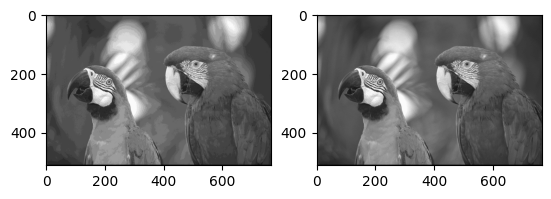

In [22]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [23]:
# Compute average quantization error for dithered image
avg_dith_error = (img - dithering).mean()
avg_dith_error

np.float64(0.38732933536595743)